In [2]:
from goes_rgb.reader import open_goes_file, get_radiance_array
from goes_rgb.visualization import plot_radiance
from datetime import datetime
from goes_rgb.aws_interface import *

Visualizando: ../data/OR_ABI-L1b-RadC-M6C01_G16_s20232201801171_e20232201803544_c20232201803599.nc


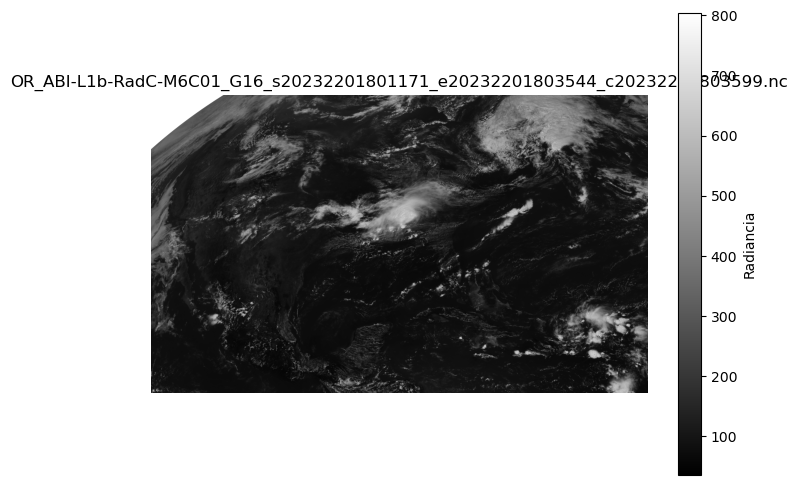

Visualizando: ../data/OR_ABI-L1b-RadC-M6C02_G16_s20232201801171_e20232201803544_c20232201803574.nc


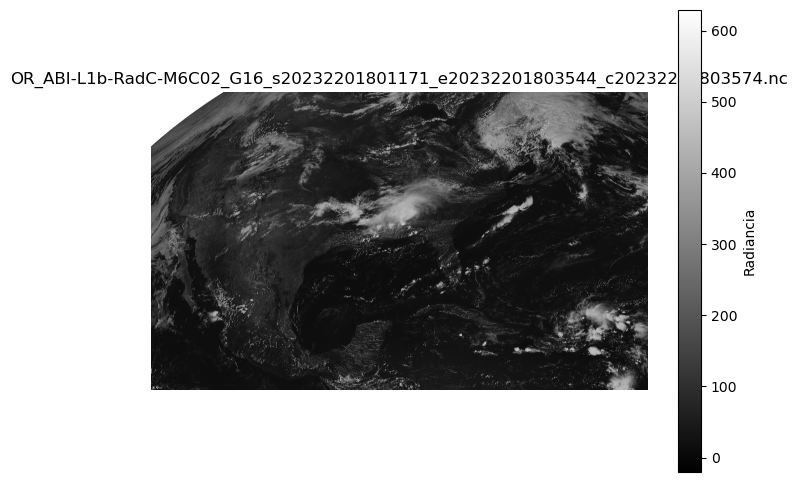

Visualizando: ../data/OR_ABI-L1b-RadC-M6C03_G16_s20232201801171_e20232201803544_c20232201803590.nc


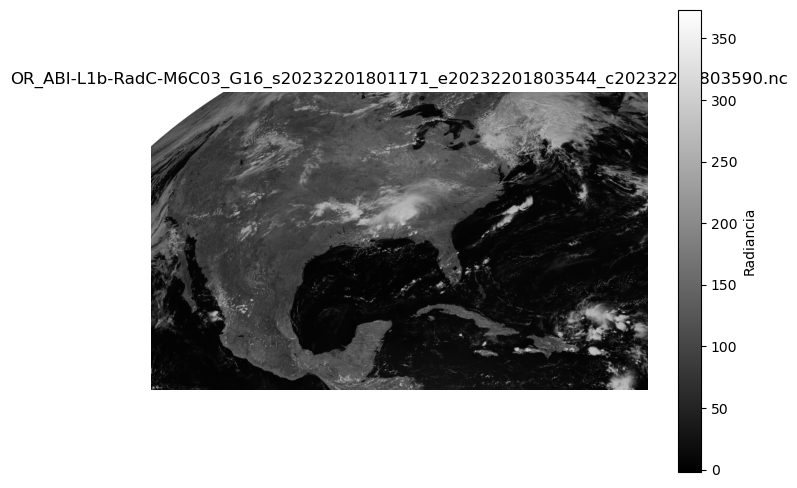

In [ ]:
import glob

# Buscar todos los archivos NetCDF en data/
archivos = glob.glob("../data/*.nc")
if not archivos:
    print("No se encontraron archivos en la carpeta data/")
else:
    for path in archivos:
        print(f"Visualizando: {path}")
        try:
            ds = open_goes_file(path)
            rad = get_radiance_array(ds)
            plot_radiance(rad, titulo=path.split("/")[-1])
        except Exception as e:
            print(f"Error al procesar {path}: {e}")

# Ejercicios del p6 

Para leer: creo que faltaría lo de calibrar los datos y eso que se hace en el practico 

In [7]:
timestamp = "2018096150040"
dt = datetime.strptime(timestamp, "%Y%j%H%M%S")
print(dt)

2018-04-06 15:00:40


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import glob 

# Descargamos las imagenes de GOES, queremos las bandas 4,7,13 y 6
download_goes_files_for_datetime_2(datetime(2018, 4, 6, 15),channels=["C04","C07","C13","C06"],product="ABI-L1b-RadF",mode="M3")

# Función de realce lineal al p porciento
def realce_p(vec, p=2):
  aux = np.sort(vec.flatten())
  imin = int(len(aux) * p / 100)
  imax = int(len(aux) * (100 - p) / 100)
  vmin = float(aux[imin])
  vmax = float(aux[imax])
  rimag = (vec - vmin) / (vmax - vmin)
  rimag[rimag < 0] = 0
  rimag[rimag > 1] = 1
  return rimag

# consigamos los arreglos de radiance a partir de los archivos descargados

files = glob.glob("data/*.nc")
img_dict = {}
datasets = []
# Recorremos los archivos y los guardamos en un diccionario
for file in files:
    file_name = file.split("/")[-1]
    ds = open_goes_file(file)
    rad = get_radiance_array(ds)
    img_dict[file_name] = rad
    datasets.append(ds)

# Ahora tenemos un diccionario con los arreglos de radiance, vamos a aplicar un realce al 2%
for file_name, rad in img_dict.items():
    # Aplicamos el realce al 2%
    rimag = realce_p(rad, p=2)
    # appendeamos el arreglo realzado al diccionario, sin perder el original
    img_dict[file_name] = (rad, rimag)



In [26]:
# Exploremos los datos en dataset 
ds = datasets[0]
# Imprimimos los atributos del dataset
#print(ds)
# Imprimimos los atributos de la banda 4
ds["Rad"]

<xarray.DataArray 'Rad' (y: 5424, x: 5424)> Size: 118MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(5424, 5424), dtype=float32)
Coordinates:
    t        datetime64[ns] 8B ...
  * y        (y) float32 22kB 0.1518 0.1518 0.1517 ... -0.1517 -0.1518 -0.1518
  * x        (x) float32 22kB -0.1518 -0.1518 -0.1517 ... 0.1517 0.1518 0.1518
    y_image  float32 4B ...
    x_image  float32 4B ...
Attributes:
    long_name:              ABI L1b Radiances
    standard_name:          toa_outgoing_radiance_per_unit_wavenumber
    sensor_band_bit_depth:  14
    valid_range:            [    0 16382]
    units:                  mW m-2 sr-1 (cm-1)-1
    resolution:             y: 0.000056 rad x: 0.000056 rad
    grid_mapping:           goes_imager_projection
    cell_methods:           t: point area: point
    ancillary_variables:    DQF

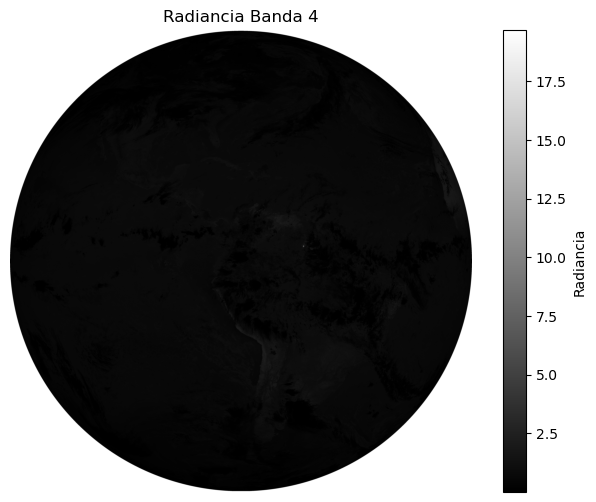

In [28]:
plot_radiance(ds["Rad"].values, titulo="Radiancia Banda 4")

In [33]:
np.unique(ds["Rad"].values)

array([1.5087761e-03, 3.0731261e-03, 4.6374798e-03, ..., 1.9049047e+01,
       1.9682610e+01,           nan], shape=(1951,), dtype=float32)

In [20]:
# exploremos el diccionario
for key in img_dict:
    print(key, img_dict[key][0].shape, img_dict[key][1].shape)

# Veamos los valores que hay en el arreglo de radiance
for key in img_dict:
    print(key, img_dict[key][0].min(), img_dict[key][0].max(), img_dict[key][1].min(), img_dict[key][1].max())

OR_ABI-L1b-RadF-M3C07_G16_s20180961500406_e20180961511184_c20180961511220.nc (5424, 5424) (5424, 5424)
OR_ABI-L1b-RadF-M3C13_G16_s20180961500406_e20180961511184_c20180961511236.nc (5424, 5424) (5424, 5424)
OR_ABI-L1b-RadF-M3C06_G16_s20180961500406_e20180961511178_c20180961511215.nc (5424, 5424) (5424, 5424)
OR_ABI-L1b-RadF-M3C04_G16_s20180961500406_e20180961511173_c20180961511197.nc (5424, 5424) (5424, 5424)
OR_ABI-L1b-RadF-M3C07_G16_s20180961500406_e20180961511184_c20180961511220.nc nan nan nan nan
OR_ABI-L1b-RadF-M3C13_G16_s20180961500406_e20180961511184_c20180961511236.nc nan nan nan nan
OR_ABI-L1b-RadF-M3C06_G16_s20180961500406_e20180961511178_c20180961511215.nc nan nan nan nan
OR_ABI-L1b-RadF-M3C04_G16_s20180961500406_e20180961511173_c20180961511197.nc nan nan nan nan


# Imagen color real 

https://www.noaa.gov/jetstream/goes_east

In [34]:
# Descargamos las imagenes de GOES, queremos las bandas 1,2 y 3 (blue,red y veggie segun la pagina)

download_goes_files_for_datetime_2(datetime(2018, 4, 6, 15),channels=["C01","C02","C03"],product="ABI-L1b-RadF",mode="M3")



['data/OR_ABI-L1b-RadF-M3C01_G16_s20180961500406_e20180961511173_c20180961511217.nc',
 'data/OR_ABI-L1b-RadF-M3C02_G16_s20180961500406_e20180961511173_c20180961511211.nc',
 'data/OR_ABI-L1b-RadF-M3C03_G16_s20180961500406_e20180961511173_c20180961511220.nc']

In [3]:
import glob
import numpy as np
import matplotlib.pyplot as plt

# levantamos los archivos de la carpeta data
files = glob.glob("data/*.nc")
img_dict = {}
datasets = []
# Recorremos los archivos y los guardamos en un diccionario
for file in files:
    file_name = file.split("/")[-1]
    ds = open_goes_file(file)
    rad = get_radiance_array(ds)
    img_dict[file_name] = rad
    datasets.append(ds)

# Ya tenemos las imagenes, las ploteamos directamente, sin realce con subplots

# fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# for i, (key, rad) in enumerate(img_dict.items()):
#     # Ploteamos la imagen
#     axs[i//3, i%3].imshow(rad, cmap="gray")
#     axs[i//3, i%3].set_title(key)
#     axs[i//3, i%3].axis("off")
# plt.tight_layout()
# plt.show()

# planteamos el rgb normal 
keys = list(img_dict.keys())
#rgb = np.zeros((img_dict[keys[0]][0].shape[0], img_dict[keys[0]][0].shape[1], 3), dtype=np.float32)


In [ ]:
from goes_rgb.visualization import plot_radiance

#ploteamos la primera imagen 
plot_radiance(img_dict[keys[0]], titulo=keys[0])